# Further Study: Newton Raphson Logistic Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Newton Raphson method is an alternative way to gradient descent in Logistic Regression.  Instead of simply looking at each step on the slope, we take a second derivative to find the curvature towards the derivatives = 0.  It is typically faster than normal gradient descent, but as the number of features grow, its performance can hurt due to matrix inverse and finding second derivatives.

## Implementation
    
1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m,  )$
        - $\mathbf{w}$ -> $(n,  )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$J = - (\sum_{i=1}^m y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)}))$$
    where $\mathbf{h}$ is defined as the sigmoid function as
    $$\mathbf{h} = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$
3. Calculate the direction based on the curvature of $\theta_j$ defined as
    $$curv(\theta_j) = \mathbf{H}^{-1}(\theta_j) \nabla \mathbf{F}(\theta_j) $$
    where $\mathbf{H}^{-1}(\theta_j)$ of $\mathbf{F}$ is a matrix of size (n, n) of second derivatives in which $\mathbf{H}_{ij} = \frac{\partial^2 \mathbf{F}}{\partial w_i \partial w_j}$  and $\nabla \mathbf{F}$ is the gradient of $\mathbf{F}$, its vector of size (n, ) of partial derivatives $[\frac{\partial \mathbf{F}}{\partial w_1}, \frac{\partial \mathbf{F}}{\partial w_2},.... \frac{\partial \mathbf{F}}{\partial w_p}]$
    - To make our program easy to implement, we can derive that 
        $$\mathbf{H} = \mathbf{X}^T\mathbf{S}\mathbf{X}$$
      where $\mathbf{S}$ is a diagonal matrix of the first derivative, i.e., $h(1-h)$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - curv$$
5. Loop 2-4 until `max_iter` is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### 1: Prepare your data

#### 1.1 Get your X and y in the right shape

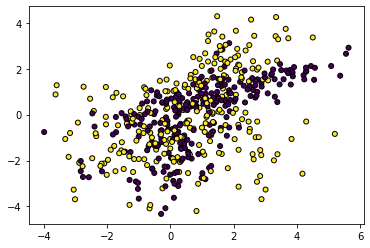

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=5, n_redundant=1, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Train test split your data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.3 Feature scale your data to reach faster convergence

In [4]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 1.4 Add intercepts

In [5]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

### 2: Fit your algorithm 

#### 1. Define your algorithm

In [6]:
# here I use mini-batch as a demonstration
# you are free to use any variants of gradient descent
def newton(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, second, first = newton_curve(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        H_inverse = np.linalg.pinv(second)
        w = w - l_rate * H_inverse @ first
    return w, i

def newton_curve(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)))
    first = (1/m) * np.dot(X.T, error)
    second = X.T @ np.diag((h) * (1-h)) @ X
    return cost, second, first

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = newton(X_train, y_train, max_iter=5000)

Cost at iteration 0 -24.26015131959808
Cost at iteration 500 -21.447753681811083
Cost at iteration 1000 -20.75015994586024
Cost at iteration 1500 -19.469842087744368
Cost at iteration 2000 -17.47481912761642
Cost at iteration 2500 -18.25098218200779
Cost at iteration 3000 -20.77038535498212
Cost at iteration 3500 -11.875127682805601
Cost at iteration 4000 -21.27041612556548
Cost at iteration 4500 -14.79996876408701


#### 2. Compute accuracy

In [7]:
from sklearn.metrics import accuracy_score
yhat = output(h_theta(X_test, w))
accuracy_score(y_test, yhat)

0.7933333333333333